# Regresión Lineal

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Plotting
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

## Datos

Ejemplo tomado de [acá](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py) (basado en edición previa de la Diplomatura de Datos).

Busquemos un conjunto de datos...

In [2]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2] # Body mass index

In [3]:
#print(diabetes)
type(diabetes)

sklearn.utils.Bunch

In [4]:
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [5]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


Dividimos los datos

In [6]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [7]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

Exploremos un poco lo que hemos hecho

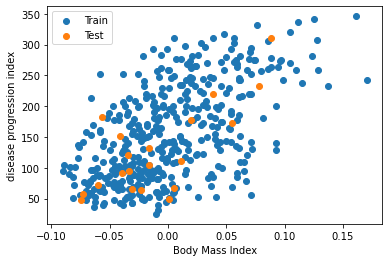

In [8]:
plt.figure()
plt.scatter(diabetes_X_train, diabetes_y_train, label="Train")
plt.scatter(diabetes_X_test, diabetes_y_test, label="Test")
plt.legend()
plt.xlabel('Body Mass Index')
plt.ylabel('disease progression index')
plt.show()

# Regresión Lineal

## Una variable

$y = \beta_0 + \beta_1 x_1$

Creamos el objeto de la regresión lineal

In [9]:
regr = linear_model.LinearRegression()

Entrenamos el modelo utilizando el conjunto de datos de entrenamiento

In [10]:
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

Para ayuda

In [11]:
regr.fit?
help(regr.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : returns an instance of self.



Signature: regr.fit(X, y, sample_weight=None)
Docstring:
Fit linear model.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    Training data

y : array-like of shape (n_samples,) or (n_samples, n_targets)
    Target values. Will be cast to X's dtype if necessary

sample_weight : array-like of shape (n_samples,), default=None
    Individual weights for each sample

    .. versionadded:: 0.17
       parameter *sample_weight* support to LinearRegression.

Returns
-------
self : returns an instance of self.
File:      c:\anaconda3\envs\mea\lib\site-packages\sklearn\linear_model\_base.py
Type:      method


Hacemos predicciones utilizando el conjunto de datos de prueba
https://scikit-learn.org/stable/

In [12]:
diabetes_y_pred = regr.predict(diabetes_X_test)

Coefficients: 938.24
Intercept: 152.92
Mean squared error: 2548.07
Variance score: 0.47


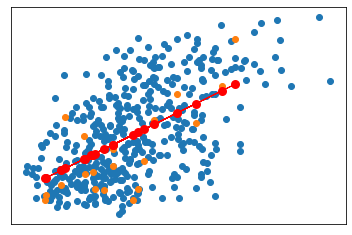

In [13]:
# The coefficients
print('Coefficients: {:.2f}'.format(regr.coef_[0]))
print(f'Intercept: {regr.intercept_:.2f}')
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.scatter(diabetes_X_test, diabetes_y_test)
plt.plot(diabetes_X_test, diabetes_y_pred,'-', color='red', linewidth=1)
plt.scatter(diabetes_X_test, diabetes_y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Y las demás variables?

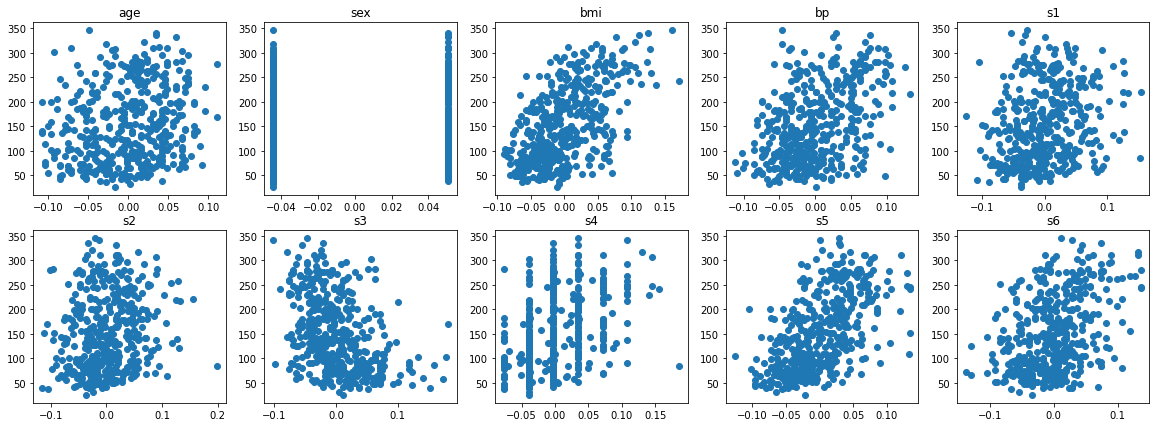

In [14]:
plt.figure(figsize=(20,7))
i=0
for var, name in zip(diabetes.data.T, diabetes.feature_names):
    i+=1
    plt.subplot(2,5,i)
    plt.scatter(var,diabetes.target)
    plt.title(name)

# Dos variables

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2$

In [15]:
diabetes_X2 = diabetes.data[:, [2,8]] # bmi and s5
# Split the data into training/testing sets
diabetes_X_train2 = diabetes_X2[:-20]
diabetes_X_test2 = diabetes_X2[-20:]

In [16]:
regr2 = linear_model.LinearRegression()

In [17]:
regr2.fit(diabetes_X_train2, diabetes_y_train)

LinearRegression()

In [18]:
diabetes_y_pred2 = regr2.predict(diabetes_X_test2)

In [19]:
# The coefficients
print('Coefficients: \n', regr2.coef_)
print(f'Intercept: {regr2.intercept_:.2f}')
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred2))

Coefficients: 
 [669.65033119 609.73334589]
Intercept: 152.95
Mean squared error: 1984.51
Variance score: 0.59


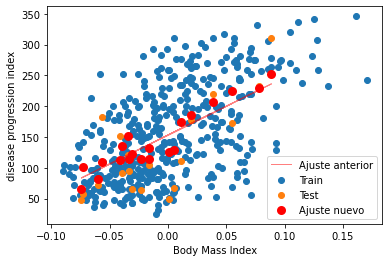

In [20]:
# Plot outputs
plt.scatter(diabetes_X_train2[:,0], diabetes_y_train, label="Train")
plt.scatter(diabetes_X_test2[:,0], diabetes_y_test, label = "Test")
plt.plot(diabetes_X_test, diabetes_y_pred,'-',
    color='red', linewidth=1, alpha=0.5, label="Ajuste anterior")
plt.scatter(diabetes_X_test2[:,0], diabetes_y_pred2,
     color='red', linewidth=3, label="Ajuste nuevo")

plt.xlabel('Body Mass Index')
plt.ylabel('disease progression index')
plt.legend()
plt.show()

## Veamos en gráficos 3D que está sucediendo

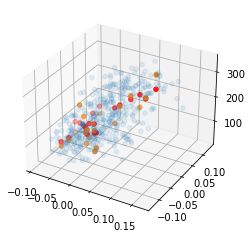

In [21]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(*diabetes_X_train2.T, diabetes_y_train,alpha=0.1)
ax.scatter(*diabetes_X_test2.T, diabetes_y_test)
ax.scatter(*diabetes_X_test2.T, diabetes_y_pred2,c='red')
plt.show()

In [22]:
df = pd.DataFrame(diabetes_X_test2)
df['target'] = diabetes_y_test
df['pred1'] = diabetes_y_pred
df['pred2'] = diabetes_y_pred2

fig1 = px.scatter_3d(df, x=0, y=1 , z='target',
                     color_discrete_sequence=['orange' for i in df.target], 
                     size=[0.1 for i in df.target])
fig2 = px.scatter_3d(df, x=0, y=1 , z='pred1',
                     color_discrete_sequence=['red' for i in df.target], 
                     size=[0.1 for i in df.target])
fig3 = px.scatter_3d(df, x=0, y=1 , z='pred2',
                     color_discrete_sequence=['green'for i in df.target], 
                     size=[0.1 for i in df.target])
fig4 = go.Figure(data=fig1.data+fig2.data+fig3.data)
fig4.show()